 # [Module 1.7] AutoGluon 훈련 및 추론

이 노트북은 아래와 같은 작업을 합니다.
- 데이터 로딩
- AutoGluon 데이터 타입으로 변경
- AutoGluon 훈련
- 테스트 데이터 로딩 및 추론
- 모델 평가
- 피쳐 Importance 생성

#### AutoGluon Tabular Prediction
- 오토글루온 Tabular 공식 페이지 입니다. 자세한 내용은 아래 링크를 참조 하세요.
    - https://autogluon.mxnet.io/stable/tutorials/tabular_prediction/index.html

## 데이터 세트 로딩
로컬에 저장된 파일을 로딩해서, 다시 한번 Shape(Row, column)을 확인하고 데이터를 확인 합니다.

In [20]:
import pandas as pd

In [21]:
%store -r no_auto_train_file
%store -r no_auto_test_file

In [22]:
train_pd = pd.read_csv(no_auto_train_file)
test_pd = pd.read_csv(no_auto_test_file)

In [23]:
print("auto_train_file: ", train_pd.shape)
print("auto_train_file: ", test_pd.shape)

auto_train_file:  (53740, 18)
auto_train_file:  (13436, 18)


In [24]:
from IPython.display import display as dp
dp(train_pd.head(2))
dp(test_pd.head(2))

,classes,customer_zip_code_prefix,customer_city,customer_state,price,freight_value,product_weight_g,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,order_weekday,order_day,order_month,customer_seller_state,customer_seller_city,customer_seller_zip_code_prefix,product_volume
0,3,12030,taubate,SP,29.99,10.96,9000.0,fashion_shoes,13481,limeira,SP,1,4,10,SP_SP,taubate_limeira,12030_13481,2640.0
1,2,78075,cuiaba,MT,23.90,26.82,1500.0,furniture_decor,17051,bauru,SP,1,4,10,MT_SP,cuiaba_bauru,78075_17051,14625.0


,classes,customer_zip_code_prefix,customer_city,customer_state,price,freight_value,product_weight_g,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,order_weekday,order_day,order_month,customer_seller_state,customer_seller_city,customer_seller_zip_code_prefix,product_volume
0,3,89219,joinville,SC,105.00,23.89,1000.0,watches_gifts,21840,rio de janeiro,RJ,1,19,6,SC_RJ,joinville_rio de janeiro,89219_21840,7632.0
1,0,9950,diadema,SP,99.97,15.80,650.0,housewares,32677,betim,MG,1,19,6,SP_MG,diadema_betim,9950_32677,9600.0


In [25]:
import autogluon.core as ag
from autogluon.tabular import TabularPrediction as task
# from autogluon import TabularPrediction as task

## 오토글루온 데이터 타입으로 변경
로컬에 저장된 파일을 오토글로온의 Tabular 데이터 타입으로 로딩 합니다. 이후 랜덤 샘플링을 하고 데이터를 확인 합니다.

In [26]:
train_data = task.Dataset(file_path= no_auto_train_file)
subsample_size = train_data.shape[0]
# subsample_size = 500  # subsample subset of data for faster demo, try setting this to much larger values
train_data = train_data.sample(n=subsample_size, random_state=0)
print(train_data.head())

Loaded data from: preproc_data/auto_no_fe/train.csv | Columns = 18 / 18 | Rows = 53740 -> 53740


       classes  customer_zip_code_prefix         customer_city customer_state  \
588          2                     83260              matinhos             PR   
45386        3                     84010          ponta grossa             PR   
9427         3                      3828             sao paulo             SP   
46834        2                     29370  conceicao do castelo             ES   
2383         3                     78070                cuiaba             MT   

        price  freight_value  product_weight_g product_category_name_english  \
588     59.99          18.00             525.0                sports_leisure   
45386  120.00          18.72            1300.0     construction_tools_lights   
9427   189.99          23.91           12675.0              office_furniture   
46834   49.99          18.23             500.0                 watches_gifts   
2383   174.90          16.92             375.0           luggage_accessories   

       seller_zip_code_prefix   

### 레이블 컬럼 지정
**레이블 컬럼을 지정하여, 오토글루온이 이 컬럼을 레이블로 인식하게 합니다.**

In [27]:
label_column = 'classes'
print("Summary of class variable: \n", train_data[label_column].describe())

Summary of class variable: 
 count    53740.000000
mean         2.178675
std          1.152687
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: classes, dtype: float64


## 오토글루운으로 훈련
- 시간 제약을 2시간으로 합니다. 하지만 아래 훈련은 약 5분 소요 됩니다.
- 하지만 presets를 best_quality 으로 설정하면, 시간은 약 1시간 30분이 소요 됩니다. 하지만 이 경우에는 성능은 다소 올라갑니다. 다른 데이터 세트의 경우는 성능이 올라가는 정도가 다를 수 있습니다. 

In [28]:
%%time
dir = 'agModels-predictClass'  # specifies folder where to store trained models
time_limits = 7200 # seconds
# presets = 'best선_quality'
presets = 'medium_quality_faster_train'

predictor = task.fit(train_data=train_data, label=label_column, 
                     output_directory=dir,
                     time_limits=time_limits,
                     presets=presets)



Beginning AutoGluon training ... Time limit = 7200s
AutoGluon will save models to agModels-predictClass/
AutoGluon Version:  0.0.15b20201025
Train Data Rows:    53740
Train Data Columns: 17
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	5 unique label values:  [2, 3, 1, 0, 4]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Train Data Class Count: 5
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    61122.4 MB
	Train Data (Original)  Memory Usage: 32.8 MB (0.1% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeat

CPU times: user 28min 41s, sys: 14min 25s, total: 43min 6s
Wall time: 3min 33s


## 테스트 데이터 로딩
- 테스트 데이터를 로딩하여 모델을 평가 합니다.
- 여기서는 y_test의 레이블만 가지고 있는 변수를 생성
- test_data_nolab는 레이블만 없는 피쳐만으로 구성된 데이터를 생성 합니다.

In [29]:
test_data = task.Dataset(file_path= no_auto_test_file)
y_test = test_data[label_column]  # values to predict
test_data_nolab = test_data.drop(labels=[label_column],axis=1)  # delete label column to prove we're not cheating
print(test_data_nolab.head())

Loaded data from: preproc_data/auto_no_fe/test.csv | Columns = 18 / 18 | Rows = 13436 -> 13436


   customer_zip_code_prefix   customer_city customer_state   price  \
0                     89219       joinville             SC  105.00   
1                      9950         diadema             SP   99.97   
2                     25963     teresopolis             RJ   76.99   
3                     21330  rio de janeiro             RJ   64.90   
4                     29090         vitoria             ES   75.00   

   freight_value  product_weight_g product_category_name_english  \
0          23.89            1000.0                 watches_gifts   
1          15.80             650.0                    housewares   
2          23.34            1850.0               books_technical   
3          15.55             200.0                    cool_stuff   
4          27.51            2550.0               furniture_decor   

   seller_zip_code_prefix     seller_city seller_state  order_weekday  \
0                   21840  rio de janeiro           RJ              1   
1                   3267

## 모델 예측
- 생성된 모델을 통해서 추론(예측)을 합니다.
- 진실값 (y_test), 예측값(prediction)을 제공하여 accuracy, f1, precision, recall 를 계산 합니다.

In [30]:
predictor = task.load(dir)  # unnecessary, just demonstrates how to load previously-trained predictor from file

prediction = predictor.predict(test_data_nolab)
print("Predictions:  ", prediction)
perf = predictor.evaluate_predictions(y_true=y_test, y_pred=prediction, auxiliary_metrics=True)

Evaluation: accuracy on test data: 0.4272849062220899
Evaluations on test data:
{
    "accuracy": 0.4272849062220899,
    "accuracy_score": 0.4272849062220899,
    "balanced_accuracy_score": 0.4157645867033414,
    "matthews_corrcoef": 0.2445000202421664
}
Detailed (per-class) classification report:
{
    "0": {
        "precision": 0.6497512437810945,
        "recall": 0.38299120234604106,
        "f1-score": 0.4819188191881919,
        "support": 1705
    },
    "1": {
        "precision": 0.5159121470192739,
        "recall": 0.27654973570398844,
        "f1-score": 0.3600813389644924,
        "support": 4162
    },
    "2": {
        "precision": 0.4427645788336933,
        "recall": 0.5424476295479603,
        "f1-score": 0.4875631751065305,
        "support": 4535
    },
    "3": {
        "precision": 0.3353915239966321,
        "recall": 0.5511992619926199,
        "f1-score": 0.4170301867038911,
        "support": 2168
    },
    "4": {
        "precision": 0.2608695652173913,

Predictions:   [2 2 2 ... 2 0 0]


아래는 5개의 레이블에 대한 예측 확률을 보여 줌.
- API URL: https://auto.gluon.ai/api/autogluon.task.html#module-autogluon.tabular.tabular_prediction

In [31]:
prediction_prob = predictor.predict_proba(test_data_nolab[0:1])
prediction_prob

array([[0.01553254, 0.05836663, 0.42110646, 0.29580975, 0.20918459]],
      dtype=float32)

## 리더 보드 생성
오토글루온에서 사용된 알고리즘의 성능 관련 지표를 확인 합니다. (예: score_test)

In [32]:
predictor.leaderboard(test_data, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,CatboostClassifier,0.456758,0.4612,0.081877,0.061523,5.079987,0.081877,0.061523,5.079987,0,True,10
1,LightGBMClassifierXT,0.440979,0.4620,0.091111,0.032794,1.363854,0.091111,0.032794,1.363854,0,True,9
2,LightGBMClassifierCustom,0.440086,0.4632,0.127292,0.036221,3.115235,0.127292,0.036221,3.115235,0,True,11
3,RandomForestClassifierEntr,0.439119,0.4552,0.740434,0.116301,4.664356,0.740434,0.116301,4.664356,0,True,5
4,LightGBMClassifier,0.436514,0.4560,0.072848,0.031136,1.182186,0.072848,0.031136,1.182186,0,True,8
5,RandomForestClassifierGini,0.430932,0.4516,1.033364,0.115428,2.405851,1.033364,0.115428,2.405851,0,True,4
6,weighted_ensemble_k0_l1,0.427285,0.4816,12.680797,2.356653,163.690503,0.054775,0.000917,0.597266,1,True,12
7,ExtraTreesClassifierEntr,0.420214,0.4320,2.382165,0.114398,1.884356,2.382165,0.114398,1.884356,0,True,7
8,ExtraTreesClassifierGini,0.414186,0.4356,2.191764,0.113517,1.583464,2.191764,0.113517,1.583464,0,True,6
9,KNeighborsClassifierUnif,0.333433,0.3292,0.215595,0.108770,0.062951,0.215595,0.108770,0.062951,0,True,2


## 모델 평가 및 Confusion 매트릭스
- SKLearn으로 accuracy, f1 score를 계산 합니다. 오토글루온의 수치와 동일한 결과가 나옵니다.
- Confusion 매트릭스 를 통해서 어느 레이블에서 잘 예측을 했는지를 확인 합니다.

In [33]:
from sklearn.metrics import accuracy_score, f1_score
accuracy = accuracy_score(y_test, prediction)
f1_score = f1_score(y_test, prediction, average='macro')
print("accuracy: %.2f%%" % accuracy)
print("f1_score: %.2f%%" % f1_score)

accuracy: 0.43%
f1_score: 0.41%


[[ 653  586  438   25    3]
 [ 198 1151 1816  897  100]
 [ 107  323 2460 1181  464]
 [  35  130  576 1195  232]
 [  12   41  266  265  282]]


<Figure size 432x288 with 0 Axes>

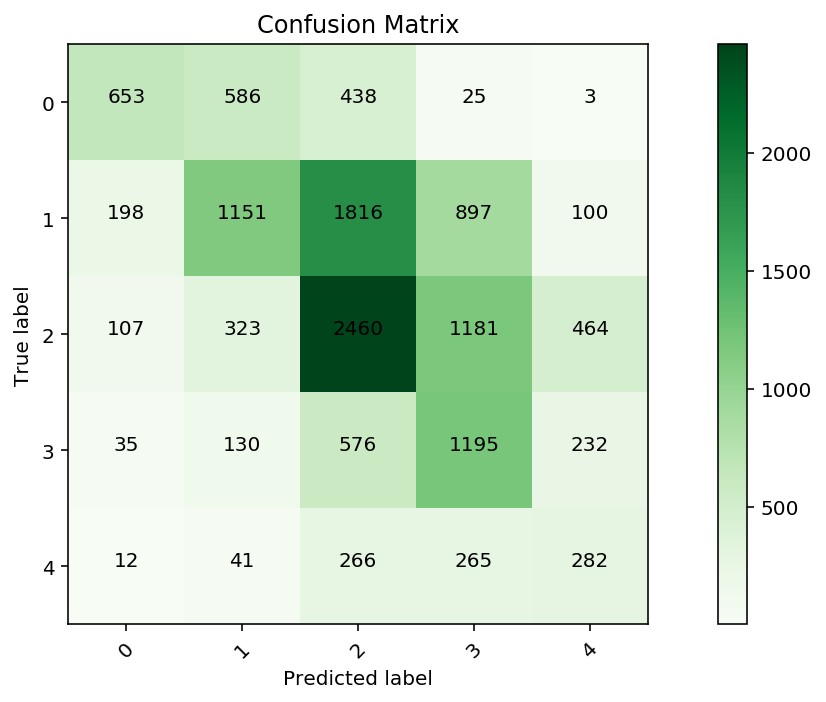

In [34]:
from utils import plot_conf_mat


from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

cm = confusion_matrix(y_true= y_test, y_pred= prediction)

plt.figure()
fig, ax = plt.subplots(figsize=(10,5))
plot_conf_mat(cm, 
              classes=['0','1', '2', '3', '4'], 
              title='Confusion Matrix')
plt.show()

## Feature Importance
- 피쳐의 중요도를 확인 합니다.

Computing raw permutation importance for 17 features on weighted_ensemble_k0_l1 ...
	77.27s	= Expected runtime
	77.22s	= Actual runtime


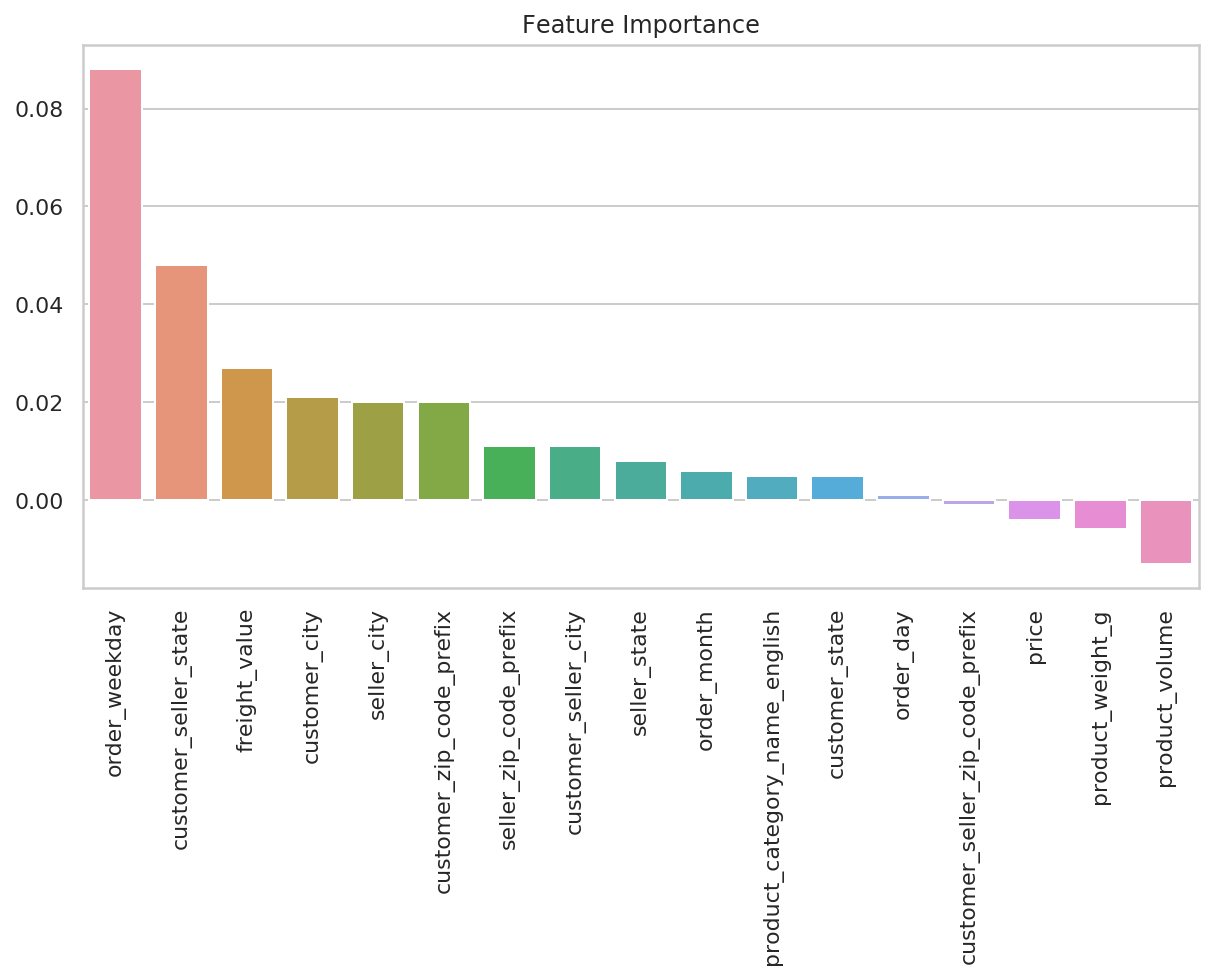

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

fea_importance = predictor.feature_importance(test_data)

f, ax = plt.subplots(figsize=(10,5))
plot = sns.barplot(x=fea_importance.index, y = fea_importance.values)
# plot = sns.barplot(x=features, y= fea_importance)
ax.set_title('Feature Importance')
plot.set_xticklabels(plot.get_xticklabels(),rotation='vertical')
plt.show()